## Setup and imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import echosms

## What reference models are available?

In [2]:
rm = echosms.ReferenceModels()
rm.names()

['fixed rigid sphere',
 'pressure release sphere',
 'gas filled sphere',
 'weakly scattering sphere',
 'spherical fluid shell with pressure release interior',
 'spherical fluid shell with gas interior',
 'spherical fluid shell with weakly scattering interior',
 'fixed rigid prolate spheroid',
 'pressure release prolate spheroid',
 'gas filled prolate spheroid',
 'weakly scattering prolate spheroid',
 'fixed rigid finite cylinder',
 'pressure release finite cylinder',
 'gas filled finite cylinder',
 'weakly scattering finite cylinder']

## Get a pre-defined model

In [3]:
p=rm.parameters('weakly scattering sphere')
p

{'boundary_type': 'fluid filled',
 'a': 0.01,
 'medium_rho': 1026.8,
 'medium_c': 1477.4,
 'target_rho': 1028.9,
 'target_c': 1480.3}

## Add run-specific parameters
The parameters from the reference models don't include the angle or the frequency, so add those in. Any item in p can be a single value or a 1-dimensional iterable.

In [4]:
p['theta']=90
p['f']=np.arange(10,200,1)*1e3
p

{'boundary_type': 'fluid filled',
 'a': 0.01,
 'medium_rho': 1026.8,
 'medium_c': 1477.4,
 'target_rho': 1028.9,
 'target_c': 1480.3,
 'theta': 90,
 'f': array([ 10000.,  11000.,  12000.,  13000.,  14000.,  15000.,  16000.,
         17000.,  18000.,  19000.,  20000.,  21000.,  22000.,  23000.,
         24000.,  25000.,  26000.,  27000.,  28000.,  29000.,  30000.,
         31000.,  32000.,  33000.,  34000.,  35000.,  36000.,  37000.,
         38000.,  39000.,  40000.,  41000.,  42000.,  43000.,  44000.,
         45000.,  46000.,  47000.,  48000.,  49000.,  50000.,  51000.,
         52000.,  53000.,  54000.,  55000.,  56000.,  57000.,  58000.,
         59000.,  60000.,  61000.,  62000.,  63000.,  64000.,  65000.,
         66000.,  67000.,  68000.,  69000.,  70000.,  71000.,  72000.,
         73000.,  74000.,  75000.,  76000.,  77000.,  78000.,  79000.,
         80000.,  81000.,  82000.,  83000.,  84000.,  85000.,  86000.,
         87000.,  88000.,  89000.,  90000.,  91000.,  92000.,  930

## Choose and run the model
We'll now run the modal series solution model using these parameters. The model takes care of getting all the possible combinations of the parameters in p. 

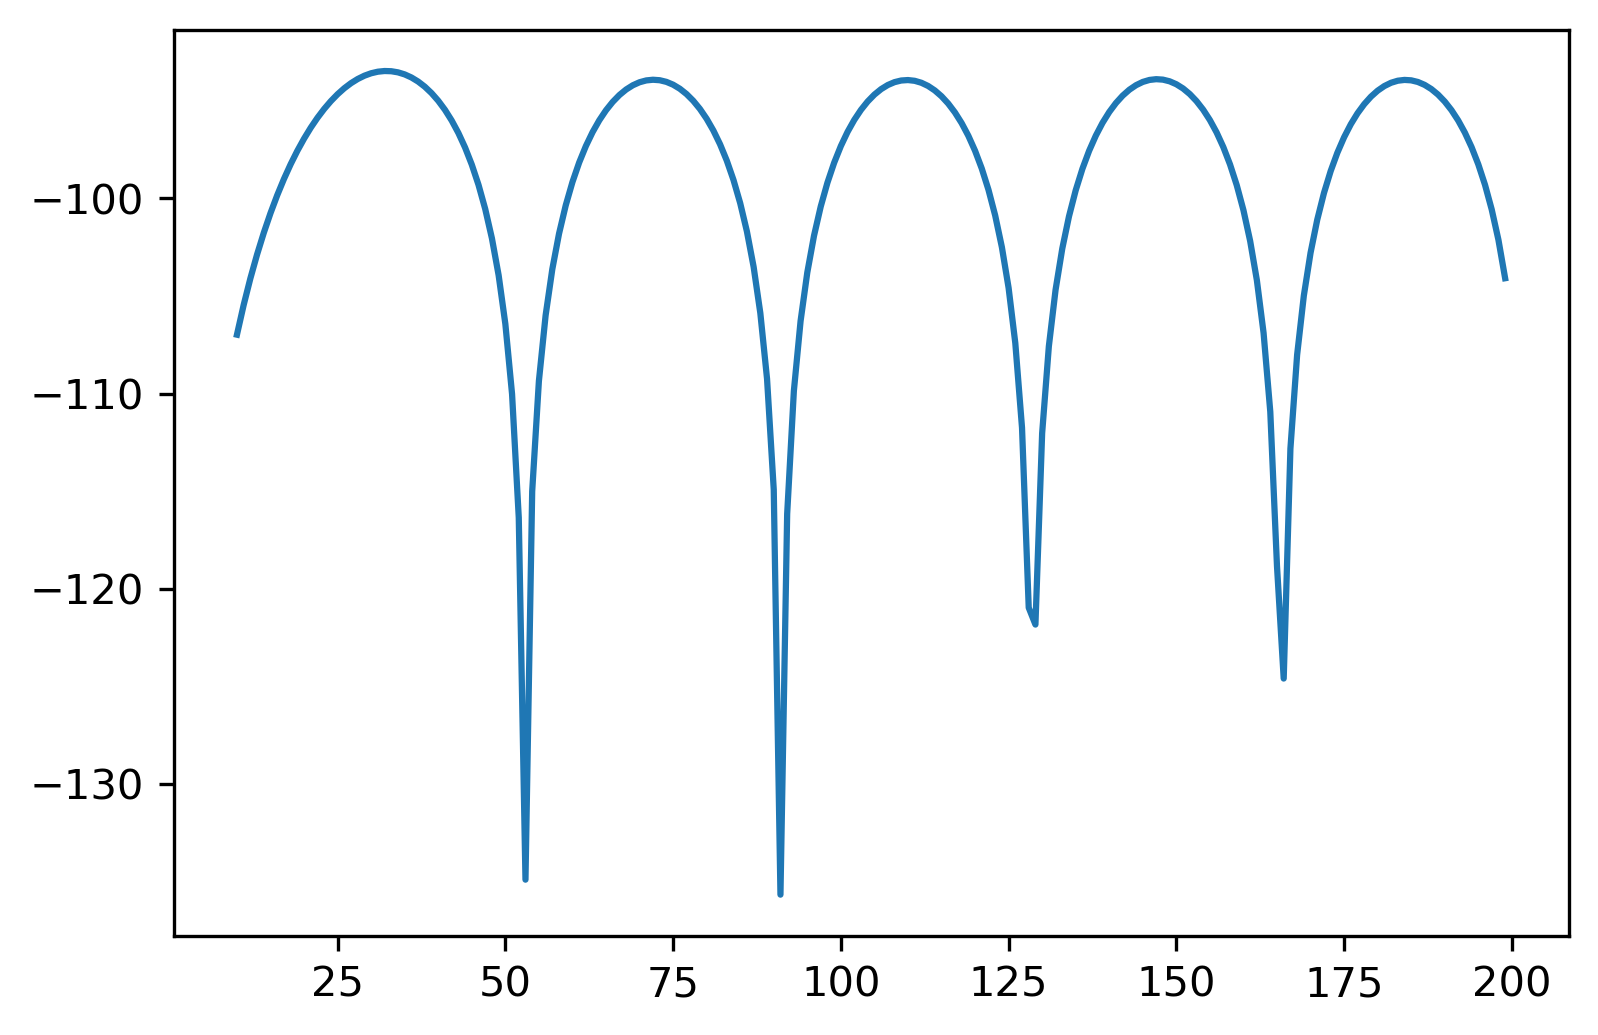

In [5]:
mss = echosms.MSSModel()
ts = mss.calculate_ts(p)
plt.plot(p['f']/1000,  ts)